# HAND WRITTEN DIGIT RECOGNITION

### Step 1: Import libraries

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
import numpy as np

### Step 2: Load the dataset

In [18]:
#loading mnist dataset
mnist = tf.keras.datasets.mnist 

In [19]:
#Dividing into train and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
x_train.shape

(60000, 28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

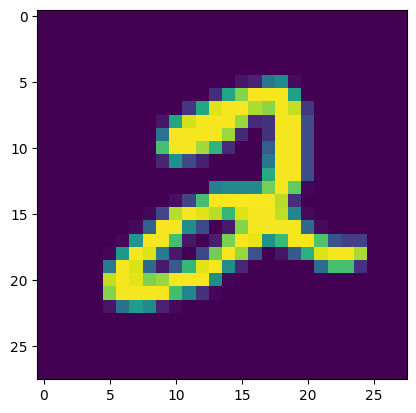

In [21]:
#Displaying the dataset
plt.imshow(x_train[5])
print (x_train[5])

### Step 3: Normalizing the images

In [22]:
# Normalizing grey images in range (0,1)
x_train = x_train/255
x_test = x_test/255

In [23]:
# Resizing image for convolution operation
img_size = 28
x_trainr = np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr = np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training samples dimention: ",x_trainr.shape)
print("Testing samples dimention: ",x_testr.shape)

Training samples dimention:  (60000, 28, 28, 1)
Testing samples dimention:  (10000, 28, 28, 1)


### Step 4: Create the Model using Convolution Layers

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#First Convoluion Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Third Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [26]:
print("Total Training Samples: ",len(x_trainr))

Total Training Samples:  60000


### Step 5: Train the Convolution Layer Model

In [27]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",  # Define the loss function for classification
    optimizer="adam",  # Specify the optimization algorithm (Adam optimizer)
    metrics=["accuracy"]  # Specify evaluation metric(s) (accuracy in this case)
)

#Train the model
model.fit(
    x_trainr,  # Training input data (features)
    y_train,  # Training target data (labels)
    epochs=5,  # Number of training epochs (iterations through the dataset)
    validation_split=0.2  # Fraction of training data used for validation
)

Epoch 1/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2590 - accuracy: 0.9193 - val_loss: 0.0882 - val_accuracy: 0.9741
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0854 - accuracy: 0.9738 - val_loss: 0.0696 - val_accuracy: 0.9805
Epoch 3/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0609 - accuracy: 0.9810 - val_loss: 0.0604 - val_accuracy: 0.9824
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0493 - accuracy: 0.9843 - val_loss: 0.0596 - val_accuracy: 0.9833
Epoch 5/5
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0572 - val_accuracy: 0.9830


### Step 6: Check accuracy of the model

In [28]:
#Testing on dataset MNIT

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples: ", test_loss)
print("Validation Acccuracy on 10,000 test samples: ", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0592 - accuracy: 0.9819
Test Loss on 10,000 test samples:  0.059231895953416824
Validation Acccuracy on 10,000 test samples:  0.9818999767303467


In [29]:
# Use the trained model to make predictions on a set of test data (x_testr)
predictions = model.predict([x_testr])

# Print the predictions, which are typically a set of probabilities for each class
print(predictions)

313/313 [==============================] - 2s 5ms/step
[[1.28699103e-05 4.44026919e-05 1.05233310e-04 ... 9.99719322e-01
  8.14921623e-06 7.29649946e-06]
 [4.43551471e-06 3.42085968e-07 9.99982595e-01 ... 1.56595803e-07
  8.38455253e-06 2.49751455e-08]
 [2.51238703e-07 9.99953032e-01 3.91271578e-06 ... 7.23279663e-06
  9.97845291e-06 2.69034587e-07]
 ...
 [3.40439482e-11 1.32383327e-10 2.13593214e-08 ... 1.74460091e-08
  3.90435329e-09 1.59997811e-07]
 [1.58463245e-05 7.39417715e-07 1.03255594e-07 ... 3.27509975e-09
  2.10066978e-03 3.16998747e-04]
 [1.99610071e-07 2.48255444e-10 2.94435125e-07 ... 1.25518684e-11
  7.11682151e-06 3.18111670e-09]]


Predicted Number:  7


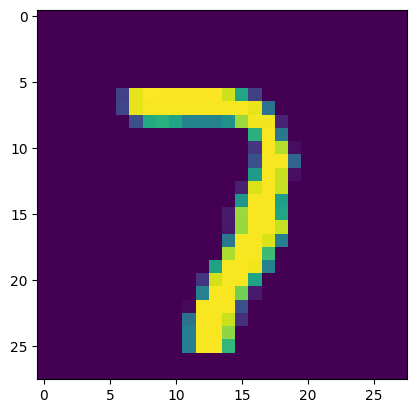

In [31]:
# Print the predicted class for the fifth sample in the predictions array
predicted_class = np.argmax(predictions[756])
print("Predicted Number: ",predicted_class)

# Display the corresponding image from the test data (assuming x_test contains the images)
plt.imshow(x_test[756])

In [32]:
# Save the CNN keras model
model.save("digit_recog_model.keras")

### Step 7: Test the model using Tkinter GUI (Run this to directly test the model without training)

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
import numpy as np
import tkinter as tk
from tkinter import Canvas, Button, Label
from PIL import Image, ImageDraw  

# Load your pre-trained Keras model
model = tf.keras.models.load_model('digit_recog_model.keras')

class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Recognizer")

        self.canvas = Canvas(root, width=280, height=280, bg="white")
        self.canvas.pack()
        self.canvas.bind("<Button-1>", self.start_draw)
        self.canvas.bind("<B1-Motion>", self.draw)

        self.predict_button = Button(root, text="Predict", command=self.predict)
        self.predict_button.pack()

        self.clear_button = Button(root, text="Clear", command=self.clear_canvas)
        self.clear_button.pack()

        self.result_label = Label(root, text="", font=("Helvetica", 24))
        self.result_label.pack()

        self.prev_x = None
        self.prev_y = None
        self.drawing = False
        self.image = Image.new("L", (280, 280), "white")

    def start_draw(self, event):
        self.prev_x = event.x
        self.prev_y = event.y
        self.drawing = True

    def draw(self, event):
        if self.drawing:
            x, y = event.x, event.y
            self.canvas.create_line((self.prev_x, self.prev_y, x, y), fill="black", width=15)
            self.image_draw = ImageDraw.Draw(self.image)
            self.image_draw.line((self.prev_x, self.prev_y, x, y), fill="black", width=15)
            self.prev_x = x
            self.prev_y = y

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (280, 280), "white")

    def predict(self):
        img = self.image.resize((28, 28), Image.BILINEAR)
        img = 255 - np.array(img)
        img = img.reshape(1, 28, 28, 1)
        img = img / 255.0

        predictions = model.predict(img)
        predicted_digit = np.argmax(predictions[0])
        confidence = np.max(predictions[0]) * 100
        confidence = round(confidence, 2)

        self.result_label.config(text=f"Predicted Digit: {predicted_digit}\nConfidence: {confidence}%")
        print("Predicted Digit: ", predicted_digit, "\nConfidence: ", confidence)
        
if __name__ == "__main__":
    root = tk.Tk()
    app = DigitRecognizerApp(root)
    root.mainloop()

1/1 [==============================] - 0s 91ms/step
Predicted Digit:  5 
Confidence:  99.61
